In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ECOv002_calval_tables import load_combined_eco_flux_ec_filtered

from carlson_leaf_area_index import carlson_leaf_area_index, inverse_carlson_NDVI

In [2]:
repository_directory = os.path.dirname(os.getcwd())
package_directory = os.path.join(repository_directory, 'carlson_leaf_area_index')
generated_output_table_filename = os.path.join(package_directory, "verification.csv")

In [3]:
tower_data_df = load_combined_eco_flux_ec_filtered()
tower_data_df

,Unnamed: 0,ID,vegetation,climate,STICinst,BESSinst,MOD16inst,PTJPLSMinst,ETinst,ETinstUncertainty,...,ESIrn_STIC,ESIrn_PTJPLSM,ESIrn_MOD16,ESIrn_BESS,ESIrn_Unc_ECO,ESIrn_LEcorr50,JET,eco_time_utc,Site Name,Date-Time
0,0,US-NC3,ENF,Cfa,270.345200,78.53355,392.851840,307.021970,487.383423,118.916280,...,0.686404,0.779526,0.997448,0.199396,0.301927,0.737734,288.683585,2019-10-02 19:09:40,US-NC3,2019-10-02 19:09:40
1,1,US-Mi3,CVM,Dfb,232.141600,229.20093,640.118470,375.089300,106.825577,167.919460,...,0.360762,0.582912,0.994784,0.356192,0.260957,0.413558,303.615450,2019-06-23 18:17:17,US-Mi3,2019-06-23 18:17:17
2,2,US-Mi3,CVM,Dfb,356.355740,335.23154,625.661700,284.686250,NaN,132.936340,...,0.566752,0.452768,0.995059,0.533156,0.211423,0.558382,345.793640,2019-06-27 16:35:42,US-Mi3,2019-06-27 16:35:42
3,3,US-Mi3,CVM,Dfb,332.938400,326.68680,624.254330,251.414490,178.827545,141.132420,...,0.531036,0.401006,0.995685,0.521065,0.225106,0.501352,329.812600,2019-06-30 15:44:10,US-Mi3,2019-06-30 15:44:10
4,4,US-Mi3,CVM,Dfb,286.854030,237.21654,511.082180,228.520170,154.791626,114.809410,...,0.559024,0.445342,0.996002,0.462290,0.223742,0.375202,262.035285,2019-07-01 14:53:48,US-Mi3,2019-07-01 14:53:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,US-xAE,GRA,Cfa,70.923310,172.37459,81.645230,15.282976,NaN,56.385185,...,0.434453,0.093619,0.500132,1.055910,0.345397,0.054837,76.284270,2021-12-11 16:01:12,US-xAE,2021-12-11 16:01:12
1061,1061,US-xAE,GRA,Cfa,116.543190,121.81641,65.469320,22.186659,NaN,40.509410,...,0.701256,0.133500,0.393938,0.732986,0.243751,0.264294,91.006255,2022-03-25 22:45:31,US-xAE,2022-03-25 22:45:31
1062,1062,US-xAE,GRA,Cfa,129.880100,0.00000,118.777240,55.343586,NaN,52.403820,...,0.550616,0.234624,0.503546,0.000000,0.222162,0.355559,87.060413,2022-04-12 22:53:09,US-xAE,2022-04-12 22:53:09
1063,1063,US-xAE,GRA,Cfa,2.707851,140.38632,126.490524,40.434025,NaN,57.769722,...,0.010924,0.163120,0.510292,0.566350,0.233056,0.269973,83.462274,2022-04-14 14:45:37,US-xAE,2022-04-14 14:45:37


In [4]:
NDVI = np.array(tower_data_df["NDVI"])
NDVI

array([0.70972943, 0.60584164, 0.5784943 , ..., 0.2829964 , 0.28405082,
       0.2792649 ], shape=(1065,))

In [5]:
LAI = carlson_leaf_area_index(NDVI)
LAI

array([2.15602837, 1.62314823, 1.50364818, ..., 0.53052757, 0.53327891,
       0.52082109], shape=(1065,))

In [6]:
inverted_NDVI = inverse_carlson_NDVI(LAI)
inverted_NDVI

array([0.70972943, 0.60584164, 0.5784943 , ..., 0.2829964 , 0.28405082,
       0.2792649 ], shape=(1065,))

In [7]:
np.any(np.abs(inverted_NDVI - NDVI) > 0.0001)

np.False_

In [8]:
df = pd.DataFrame({
    "NDVI": NDVI,
    "LAI": LAI,
    "inverted_NDVI": inverted_NDVI
})

df

,NDVI,LAI,inverted_NDVI
0,0.709729,2.156028,0.709729
1,0.605842,1.623148,0.605842
2,0.578494,1.503648,0.578494
3,0.658499,1.875535,0.658499
4,0.666747,1.918121,0.666747
...,...,...,...
1060,0.268441,0.492929,0.268441
1061,0.225175,0.385169,0.225175
1062,0.282996,0.530528,0.282996
1063,0.284051,0.533279,0.284051


In [9]:
df.to_csv(generated_output_table_filename, index=False)

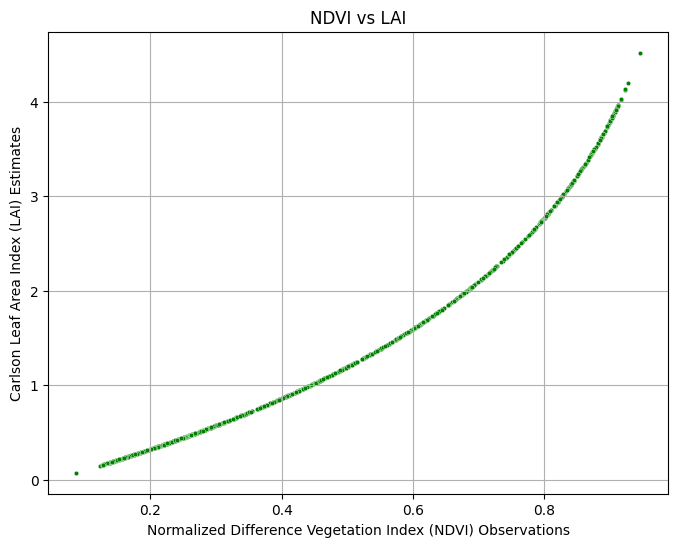

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="NDVI", y="LAI", data=df, color="green", s=10)
plt.title("NDVI vs LAI")
plt.xlabel("Normalized Difference Vegetation Index (NDVI) Observations")
plt.ylabel("Carlson Leaf Area Index (LAI) Estimates")
plt.grid(True)
plt.show()

In [13]:
# Calculate and display the error between NDVI and inverted_NDVI
ndvi_error = NDVI - inverted_NDVI
print("NDVI - inverted_NDVI (first 10 values):", ndvi_error[:10])
print("Mean absolute error:", np.mean(np.abs(ndvi_error)))

NDVI - inverted_NDVI (first 10 values): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean absolute error: nan


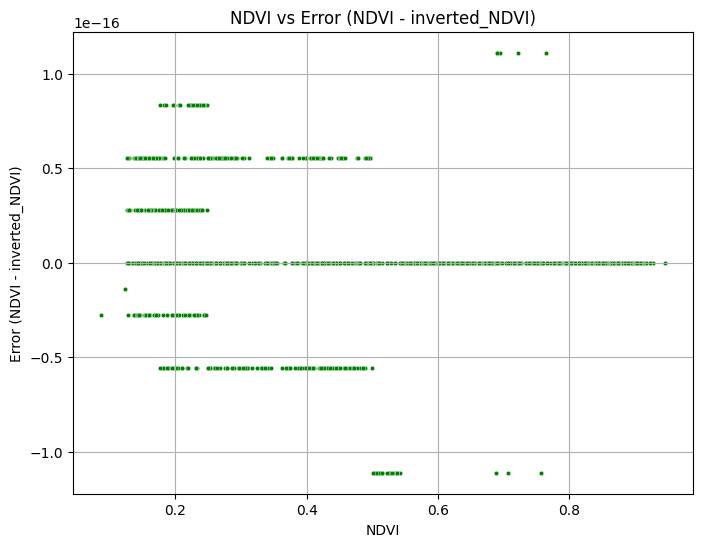

In [14]:
# Seaborn plot of NDVI vs error (NDVI - inverted_NDVI)
ndvi_error = NDVI - inverted_NDVI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=NDVI, y=ndvi_error, color="green", s=10)
plt.title("NDVI vs Error (NDVI - inverted_NDVI)")
plt.xlabel("NDVI")
plt.ylabel("Error (NDVI - inverted_NDVI)")
plt.grid(True)
plt.show()